# EDA

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from sklearn.cluster import DBSCAN

sys.path.append('../utils')
import helpers as h

## Declare notebook constants

In [4]:
ITM_DIR = os.path.join(os.getcwd(), '../data/intermediate')

## Read parsed data

In [7]:
request_df = pd.read_csv(os.path.join(ITM_DIR, 'requests.csv'))

## Basic EDA:

In [9]:
request_df.columns

Index(['file_uuid', 'configurationName', 'id', 'lat', 'long', 'start_time',
       'end_time', 'dir', 'route_id', 'route_date', 'idblock_1', 'idblock_2',
       'idblock_3', 'internal_id'],
      dtype='object')

In [10]:
request_df

,file_uuid,configurationName,id,lat,long,start_time,end_time,dir,route_id,route_date,idblock_1,idblock_2,idblock_3,internal_id
0,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,2022-06-17T07:30:00,2022-06-17T18:00:00,0521_300-20220617,0521_300,2022-06-17,55733,2,0,1
1,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,2022-06-17T08:00:00,2022-06-17T17:00:00,0521_300-20220617,0521_300,2022-06-17,55733,2,0,1
2,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,2022-06-17T07:30:00,2022-06-17T23:59:00,0521_300-20220617,0521_300,2022-06-17,85002,2,0,2
3,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,2022-06-17T08:00:00,2022-06-17T17:00:00,0521_300-20220617,0521_300,2022-06-17,85002,2,0,2
4,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,388,0.572716,0.233306,2022-06-17T07:30:00,2022-06-17T23:59:00,0521_300-20220617,0521_300,2022-06-17,92416,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576108,8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1,EstimateTime,63785,0.483888,0.300764,2022-06-22T00:00:00,2022-06-22T23:59:00,0521_O69-20220622,0521_O69,2022-06-22,83833,139,139,21706
2576109,8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1,EstimateTime,63788,0.487687,0.296260,2022-06-22T07:30:00,2022-06-22T23:59:00,0521_O69-20220622,0521_O69,2022-06-22,83833,139,139,21706
2576110,8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1,EstimateTime,63789,0.488695,0.295566,2022-06-22T07:30:00,2022-06-22T23:59:00,0521_O69-20220622,0521_O69,2022-06-22,83833,139,139,21706
2576111,8a8e6d6b-045c-44bd-9085-cf2d5ec7a6d1,EstimateTime,63790,0.488135,0.294694,2022-06-22T07:30:00,2022-06-22T23:59:00,0521_O69-20220622,0521_O69,2022-06-22,83833,139,139,21706


Text(0, 0.5, 'Frequency')

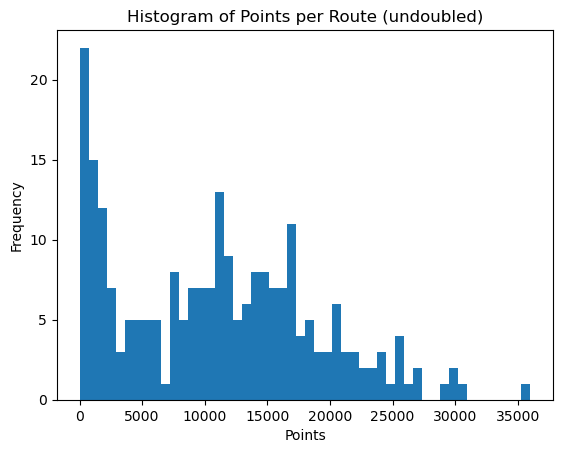

In [ ]:
#how many points per route_id (Undoubled)
points_per_route = request_df.groupby('route_id')['route_id'].count()
plt.hist(points_per_route, bins = 50)
plt.title('Histogram of Points per Route (undoubled)')
plt.xlabel('Points')
plt.ylabel('Frequency')

## Finding clusters

In [29]:
print(np.min(request_df['lat']), np.max(request_df['lat']))
print(np.min(request_df['long']), np.max(request_df['long']))
# no need to scale  (values are between 0 and 1, but you see there's a strong center, zoomed in above. )

0.0 1.0
0.0 1.0


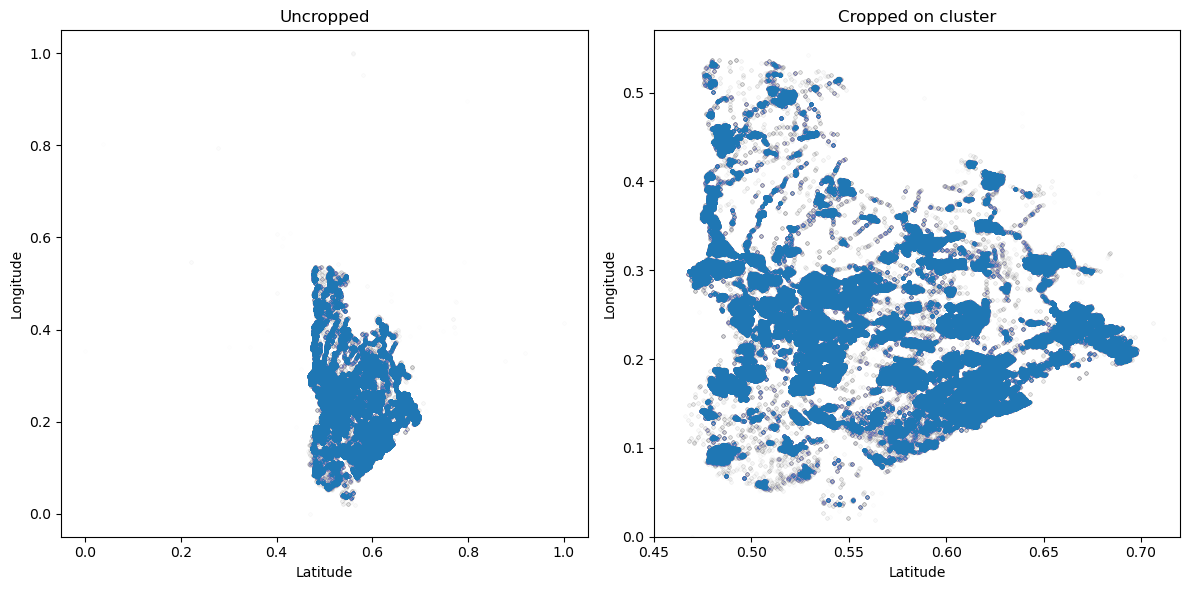

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(x=request_df['lat'], y=request_df['long'], alpha=0.005, marker='.')
axs[0].set_title('Uncropped')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')
axs[1].scatter(x=request_df['lat'], y=request_df['long'], alpha=0.005, marker='.')
axs[1].set_xlim(0.45, 0.72)
axs[1].set_ylim(0, 0.57)
axs[1].set_title('Cropped on cluster')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')
plt.tight_layout()

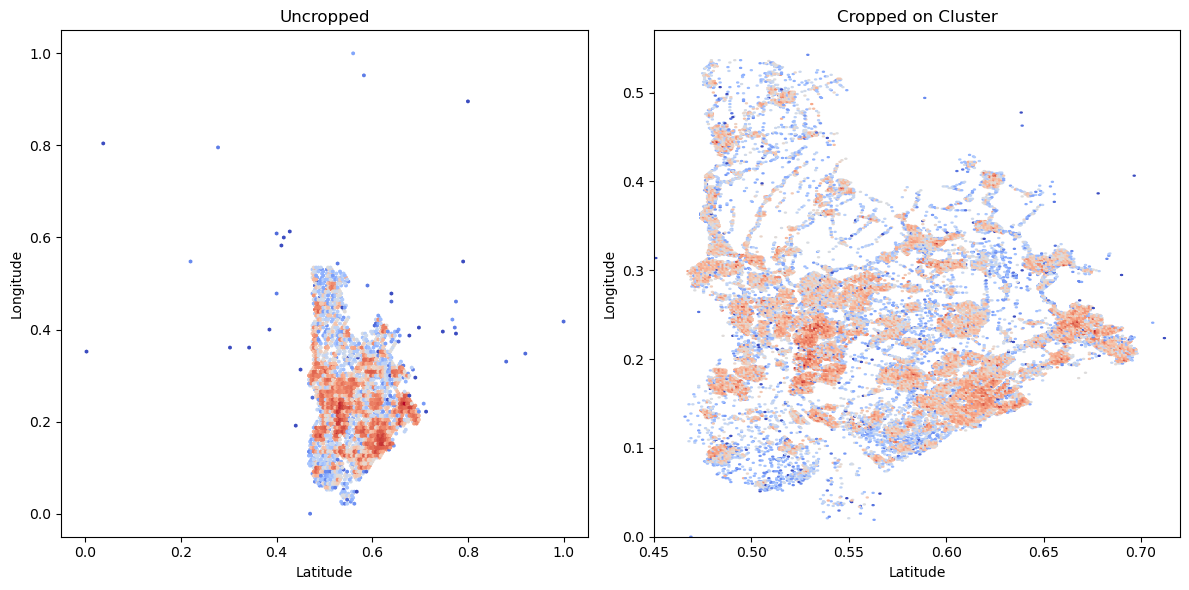

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Left plot: Uncropped hexbin
axs[0].hexbin(request_df['lat'], request_df['long'], gridsize=200, cmap="coolwarm", bins="log")
axs[0].set_title('Uncropped')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')
axs[0].grid(False)
# Right plot: Cropped on cluster
axs[1].hexbin(request_df['lat'], request_df['long'], gridsize=1000, cmap="coolwarm", bins="log")
axs[1].set_xlim(0.45, 0.72) 
axs[1].set_ylim(0, 0.57)
axs[1].set_title('Cropped on Cluster')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')
axs[1].grid(False)
# Adjust layout
plt.tight_layout()

In [44]:
coordinates = request_df[['lat', 'long']].values
coordinates = coordinates[0:10000]
#no need to scale - values are already between 0 and 1
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(coordinates)
request_df['cluster'] = clusters
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
plt.scatter(request_df['lat'], request_df['long'], c=request_df['cluster'], cmap='viridis', s=1)
plt.colorbar(label='Cluster Label')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('DBSCAN Clustering of Coordinates')


ValueError: Length of values (10000) does not match length of index (2576113)

In [34]:
coordinates = request_df[['lat', 'long']].values


In [43]:
coordinates[0:10000]

array([[0.56582567, 0.22186827],
       [0.56582567, 0.22186827],
       [0.56582567, 0.22186827],
       ...,
       [0.64424723, 0.30624856],
       [0.64680398, 0.30330005],
       [0.64272415, 0.30942562]])